<a href="https://colab.research.google.com/github/psicoandino/ba_tarea2/blob/main/Inicio_Tarea_2_o2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### librerias
import pandas as pd
import numpy as np
from sklearn import metrics
from numpy.linalg import pinv
import matplotlib.pyplot as plt 
from numpy import linalg as LA

In [ ]:
### carga_caracteristicas_X
URL_X ="https://raw.githubusercontent.com/psicoandino/ba_tarea2/main/X.csv"
X = pd.read_csv(URL_X, sep=';')
X = X.loc[:,X.columns[1:]]
Xs = np.asarray(X)
print('Observaciones - N = %.1d' %len(X))

### carga_caracteristica_y
URL_y ="https://raw.githubusercontent.com/psicoandino/ba_tarea2/main/y.csv"
y = pd.read_csv(URL_y, sep=';', header=None)
y = y.loc[:,1]
y[y==0] = -1
ys = np.asarray(y)
print('Características - M = %.1d' %len(X.columns))

### definicion smoothed-hinge loss:
def error_gdb(Xs,ys,w_t):
    Xw = np.dot(Xs,w_t)
    resultado = Xw * ys

    caso1 = resultado>1
    caso2 = resultado<0
    caso3 = ((resultado<=1) & (resultado>=0))
    
    resultado[caso1] = 0
    resultado[caso2] = 0.5-resultado[caso2]
    resultado[caso3] = 0.5*((1-resultado[caso3])**2)
    
    return resultado

### otros
n = Xs.shape[0]
d = Xs.shape[1]

Observaciones - N = 20000
Características - M = 23


## 1. 1.Definición Gradiente

El gradiente de $L(w)$ para el _batch_ total de datos viene dado por:

$$
\frac{\partial L(w)}{\partial w} = \frac{\partial L(g(w))}{\partial w} = 
\frac{\partial L}{\partial z} \times \frac{\partial z}{\partial w} \\\\
$$

Donde $z = \gamma(x_i, y_i, w)$, de esta forma:

$$
\frac{\partial L(w)}{\partial w}  = \frac{1}{n} \sum_{i=1}^{n} \frac{\partial z}{\partial w}
$$

Donde $\frac{\partial z}{\partial w}$ corresponde a:

$$
\gamma'(x_i, y_i, w) =  \left\{\begin{matrix}
0 & \textsf{ si } \ y_iw^Tx_i > 1\\ 
-X^T*y & \textsf{ si } \ y_iw^Tx_i < 0\\ 
y_iw^Tx_i X^T*y - X^T*y & \textsf{ caso contrario }
\end{matrix}\right.\\\\
$$

Reordenando los términos, la expresión para el gradiente queda de la siguiente forma:

$$
\frac{\partial L(w)}{\partial w} = \nabla_wL(w)= \frac{1}{n} * X^T (y*\gamma'(X, y, w))
$$

Donde $\gamma'(X, y, w)$ corresponde a:
$$
\gamma'(x_i, y_i, w) = \left\{
    \begin{array}\\
        0 & \mbox{si } \ y_iw^Tx_i > 1  \\
        -1 & \mbox{si } \ y_iw^Tx_i < 0  \\
        y_iw^Tx_i - 1 & \mbox{caso contrario}
    \end{array}
\right.
$$


In [ ]:
### definición gradiente_batch
def gradiente_batch(Xs,ys,w):
    Xw = np.dot(Xs,w)
    resultado = Xw * ys
    caso1 = resultado>1
    caso2 = resultado<0
    caso3 = ((resultado<=1) & (resultado>=0))
    
    resultado[caso1] = 0
    resultado[caso2] = -1
    resultado[caso3] = resultado[caso3] -1
    return 1/n * np.dot(Xs.T,(ys *resultado))

## 2. 2.Batch Gradient Descent & Momentum.

### 2.1.Batch Gradient Descent.

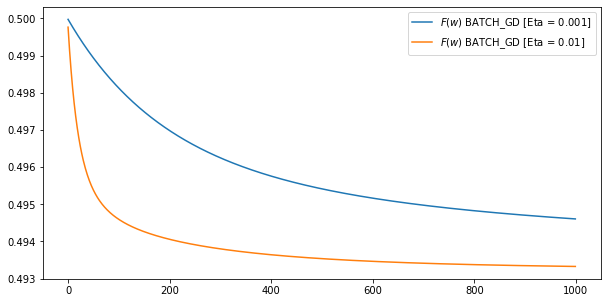

In [ ]:
etas = [0.001 , 0.01]
epoch = 1000
res_obj_func_BGD =[]

for eta in etas:
  w_t = np.zeros(d)
  t = 0  
  objective_func_BGD = []
  distancia_w_BGD = []
  # Loop:
  while t <= epoch:
    g = gradiente_batch(Xs,ys,w_t)
    w_t = w_t - eta * g
    t=t+1

    error = np.sum(error_gdb(Xs,ys,w_t))/n
    objective_func_BGD.append(error)
    
  res_obj_func_BGD.append(objective_func_BGD)

plt.figure(figsize=(10,5))
plt.plot((res_obj_func_BGD[0])[:epoch], label='$F(w)$ BATCH_GD' + ' [Eta = 0.001]')
plt.plot((res_obj_func_BGD[1])[:epoch], label='$F(w)$ BATCH_GD' + ' [Eta = 0.01]')
plt.legend(loc='upper right')

### 2.2.Batch Gradient Descent Momentum.

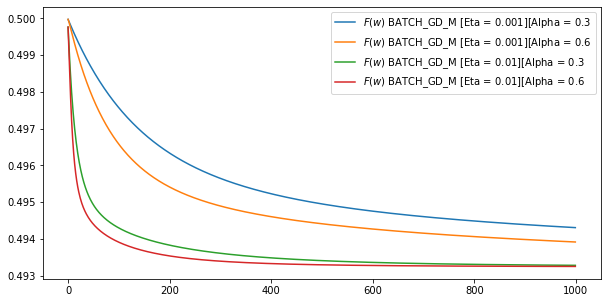

In [ ]:
etas = [0.001 , 0.01]
epoch = 1000
alphas=[0.3,0.6]
res_obj_func_BGD_M =[]

for eta in etas:
  for alpha in alphas:
    t=0
    v = np.zeros(d)
    w_t = np.zeros(d)

    objective_func_BGD_M = []
    # Loop:
    while t <= epoch:
      g = gradiente_batch(Xs,ys,w_t)
      v = alpha*v - eta * g
      w_t = w_t + v
      t=t+1
      
      error = np.sum(error_gdb(Xs,ys,w_t))/n
      objective_func_BGD_M.append(error)

    res_obj_func_BGD_M.append(objective_func_BGD_M)

plt.figure(figsize=(10,5))
plt.plot((res_obj_func_BGD_M[0])[:epoch], label='$F(w)$ BATCH_GD_M' + ' [Eta = 0.001]'+'[Alpha = 0.3')
plt.plot((res_obj_func_BGD_M[1])[:epoch], label='$F(w)$ BATCH_GD_M' + ' [Eta = 0.001]'+'[Alpha = 0.6')
plt.plot((res_obj_func_BGD_M[2])[:epoch], label='$F(w)$ BATCH_GD_M' + ' [Eta = 0.01]'+'[Alpha = 0.3')
plt.plot((res_obj_func_BGD_M[3])[:epoch], label='$F(w)$ BATCH_GD_M' + ' [Eta = 0.01]'+'[Alpha = 0.6')
plt.legend(loc='upper right')

### 2.3.Visualización.

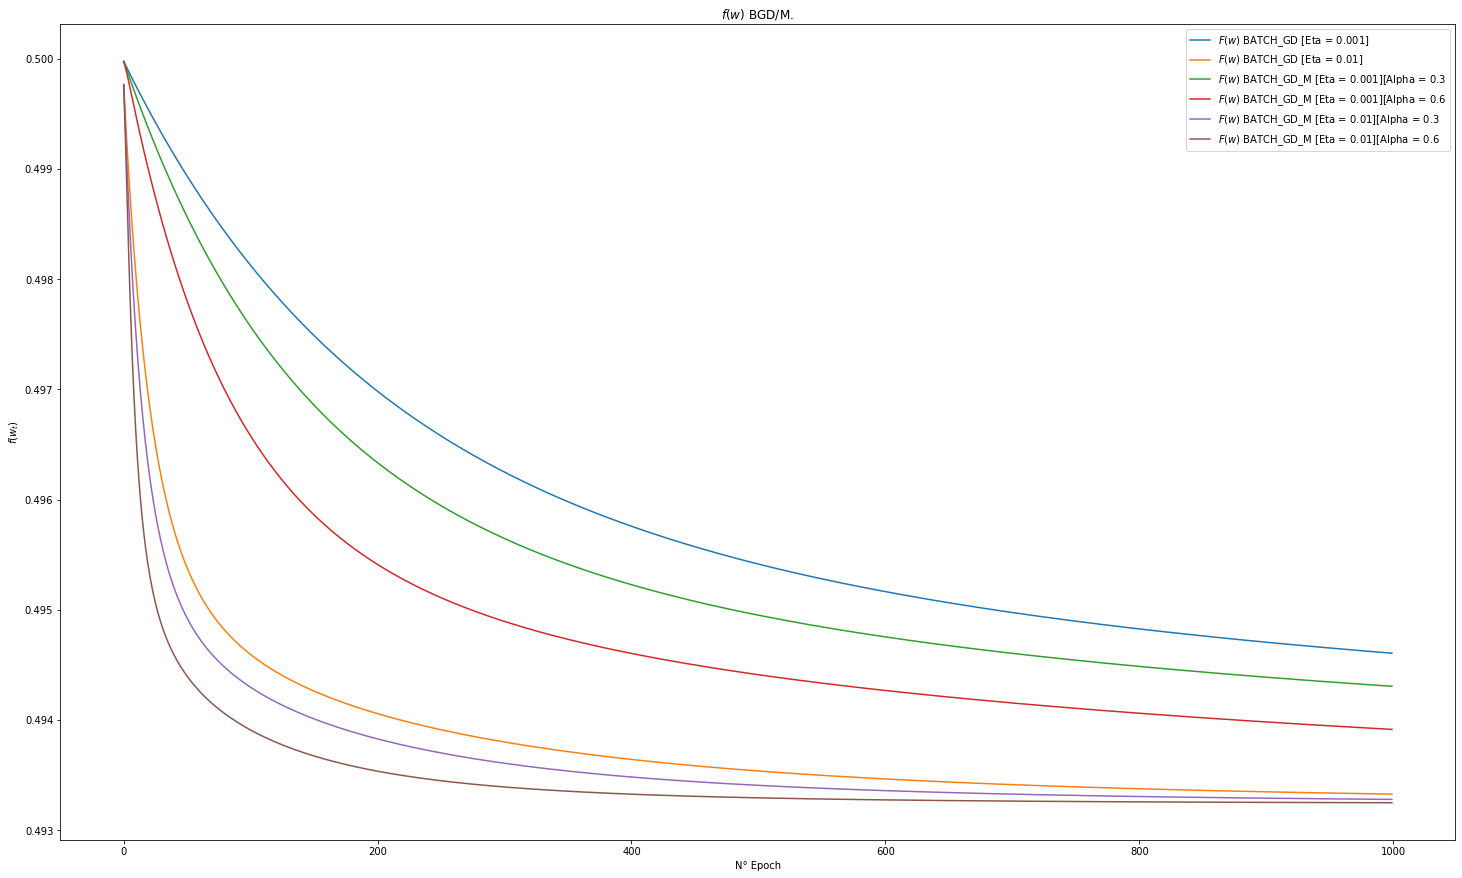

In [ ]:
plt.figure(figsize=(25,15))
plt.plot((res_obj_func_BGD[0])[:epoch], label='$F(w)$ BATCH_GD' + ' [Eta = 0.001]')
plt.plot((res_obj_func_BGD[1])[:epoch], label='$F(w)$ BATCH_GD' + ' [Eta = 0.01]')
plt.plot((res_obj_func_BGD_M[0])[:epoch], label='$F(w)$ BATCH_GD_M' + ' [Eta = 0.001]'+'[Alpha = 0.3')
plt.plot((res_obj_func_BGD_M[1])[:epoch], label='$F(w)$ BATCH_GD_M' + ' [Eta = 0.001]'+'[Alpha = 0.6')
plt.plot((res_obj_func_BGD_M[2])[:epoch], label='$F(w)$ BATCH_GD_M' + ' [Eta = 0.01]'+'[Alpha = 0.3')
plt.plot((res_obj_func_BGD_M[3])[:epoch], label='$F(w)$ BATCH_GD_M' + ' [Eta = 0.01]'+'[Alpha = 0.6')
plt.yscale('linear')
plt.xlabel('N° Epoch')
plt.ylabel('$f(w_t)$')
plt.title('$f(w)$ BGD/M.')
plt.legend(loc='upper right')
plt.show()

Se puede apreciar que al cabo de 1000 epochs, el **Algoritmo Batch Gradient Descent Momentum** (con una configuración de Hiperparámetros **[Tasa de Aprendizaje = 0.01; Alpha = 0.6]**), es el que **más rápido converge a un mínimo de la función**.
Luego lo podemos corroborar comparando cada uno de los valores mínimos.

In [ ]:
print(min(res_obj_func_BGD[0]))
print(min(res_obj_func_BGD[1]))
print(min(res_obj_func_BGD_M[0]))
print(min(res_obj_func_BGD_M[1]))
print(min(res_obj_func_BGD_M[2]))
print(min(res_obj_func_BGD_M[3]), " <- mínimo.")

0.49460587109248383
0.49332796711483107
0.4943058637969899
0.4939148177437988
0.49328004265929776
0.4932497793483685  <- mínimo.


## 3. 3.Definición Gradiente Minibatch.

Ahora, el gradiente $L(w)$ del Minibatch de tamaño $m$ está definido como:
$$
\frac{\partial L(w)}{\partial w} = \nabla_wL(w)= \frac{1}{m} * X^T_{[im:(i+1)m]} (y_{[im:(i+1)m]}*\gamma'(X_{[im:(i+1)m]}, y_{[im:(i+1)m]}, w))
$$


Donde $\gamma'(X, y, w)$ corresponde a:
$$
\gamma'(x_i, y_i, w) = \left\{
    \begin{array}\\
        0 & \mbox{si } \ y_iw^Tx_i > 1  \\
        -1 & \mbox{si } \ y_iw^Tx_i < 0  \\
        y_iw^Tx_i - 1 & \mbox{caso contrario}
    \end{array}
\right.
$$

In [ ]:
### definicion gradiente minibatch:
def gradiente_minibatch(Xs,ys,w,m,i):
    Xw = np.dot(Xs[i*m:(i+1)*m,:],w)
    resultado = Xw * ys[i*m: (i+1)*m]
    
    caso1 = resultado>1
    caso2 = resultado<0
    caso3 = ((resultado<=1) & (resultado>=0))
    
    resultado[caso1] = 0
    resultado[caso2] = -1
    resultado[caso3] = resultado[caso3] -1
    
    return 1/m * np.dot(Xs[i*m:(i+1)*m,:].T,(ys[i*m:(i+1)*m]*resultado))

## 4. 4.Minibatch Gradient Descent & Momentum.

### 4.1.MiniBatch Gradient Descent.

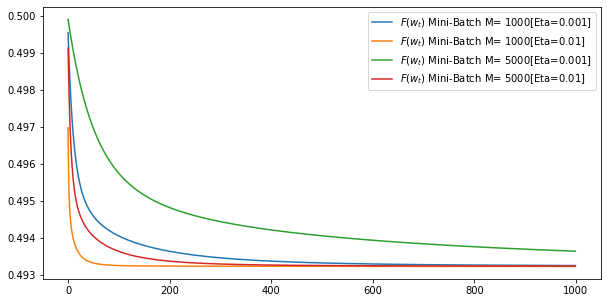

In [ ]:
ms=[1000,5000]
etas=[0.001,0.01]
res_obj_func_MBGD=[]
for m in ms:
  for eta in etas:
    w_t = np.zeros(d)

    epoch = 1000
    t = 0
    decay = 10**(-13)
    i = 0

    objective_func_MBGD = []

    # Loop:
    while t <= epoch:
      permutation = np.random.permutation(Xs.shape[0])
      Xs = Xs[permutation]
      ys = ys[permutation]

      while i <= int(np.floor(Xs.shape[0]/m)):
        g_t = gradiente_minibatch(Xs,ys,w_t,m,i)
        #v_t
        w_t = w_t - eta * g_t
        i = i + 1

      eta = eta * (1/(1+decay*t))
      t=t+1
      i = 0

      error = np.sum(error_gdb(Xs,ys,w_t))/n
      objective_func_MBGD.append(error)

    res_obj_func_MBGD.append(objective_func_MBGD)

plt.figure(figsize=(10,5))
plt.plot(res_obj_func_MBGD[0][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.001]')
plt.plot(res_obj_func_MBGD[1][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.01]')
plt.plot(res_obj_func_MBGD[2][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(5000)+'[Eta=0.001]')
plt.plot(res_obj_func_MBGD[3][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(5000)+'[Eta=0.01]')
plt.legend(loc='upper right')


### 4.2.MiniBatch Gradient Descent Momentum.

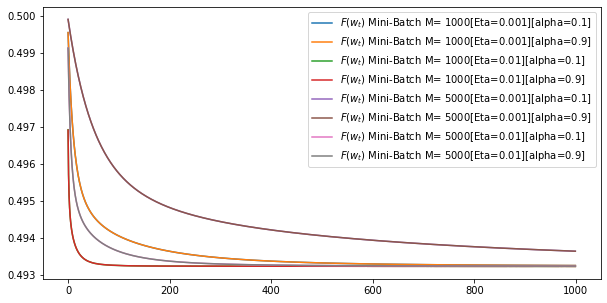

In [ ]:
ms=[1000,5000]
etas=[0.001,0.01]
alphas=[0.1,0.9]
res_obj_func_MBGD_M=[]
for m in ms:
  for eta in etas:
    for alpha in alphas:
      w_t = np.zeros(d)
      v_t = np.zeros(d)
      epoch = 1000
      t = 0
      decay = 10**(-13)
      i = 0

      objective_func_MBGD_M = []

      # Loop:
      while t <= epoch:
        permutation = np.random.permutation(Xs.shape[0])
        Xs = Xs[permutation]
        ys = ys[permutation]

        while i <= int(np.floor(Xs.shape[0]/m)):
          g_t = gradiente_minibatch(Xs,ys,w_t,m,i)
          v_t = alpha*v_t - eta * g_t
          w_t = w_t - eta * g_t
          i = i + 1

        eta = eta * (1/(1+decay*t))
        t=t+1
        i = 0

        error = np.sum(error_gdb(Xs,ys,w_t))/n
        objective_func_MBGD_M.append(error)

      res_obj_func_MBGD_M.append(objective_func_MBGD_M)

plt.figure(figsize=(10,5))
plt.plot(res_obj_func_MBGD_M[0][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.001]'+'[alpha=0.1]')
plt.plot(res_obj_func_MBGD_M[1][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.001]'+'[alpha=0.9]')
plt.plot(res_obj_func_MBGD_M[2][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.01]'+'[alpha=0.1]')
plt.plot(res_obj_func_MBGD_M[3][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.01]'+'[alpha=0.9]')
plt.plot(res_obj_func_MBGD_M[4][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(5000)+'[Eta=0.001]'+'[alpha=0.1]')
plt.plot(res_obj_func_MBGD_M[5][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(5000)+'[Eta=0.001]'+'[alpha=0.9]')
plt.plot(res_obj_func_MBGD_M[6][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(5000)+'[Eta=0.01]'+'[alpha=0.1]')
plt.plot(res_obj_func_MBGD_M[7][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(5000)+'[Eta=0.01]'+'[alpha=0.9]')
plt.legend(loc='upper right')

### 4.3.Visualización.

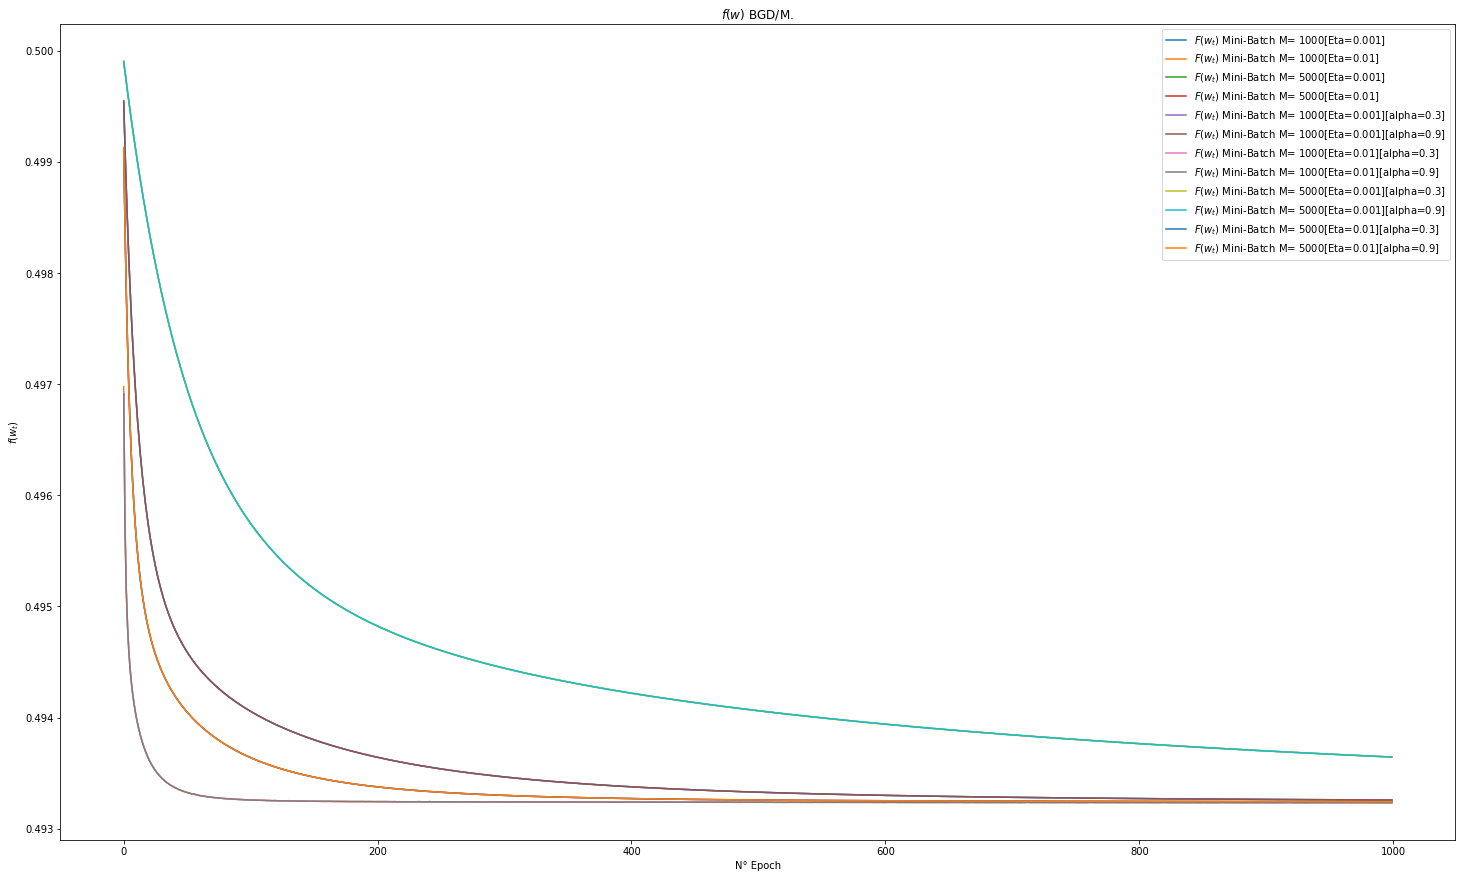

In [ ]:
plt.figure(figsize=(25,15))
plt.plot(res_obj_func_MBGD[0][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.001]')
plt.plot(res_obj_func_MBGD[1][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.01]')
plt.plot(res_obj_func_MBGD[2][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(5000)+'[Eta=0.001]')
plt.plot(res_obj_func_MBGD[3][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(5000)+'[Eta=0.01]')
plt.plot(res_obj_func_MBGD_M[0][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.001]'+'[alpha=0.3]')
plt.plot(res_obj_func_MBGD_M[1][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.001]'+'[alpha=0.9]')
plt.plot(res_obj_func_MBGD_M[2][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.01]'+'[alpha=0.3]')
plt.plot(res_obj_func_MBGD_M[3][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.01]'+'[alpha=0.9]')
plt.plot(res_obj_func_MBGD_M[4][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(5000)+'[Eta=0.001]'+'[alpha=0.3]')
plt.plot(res_obj_func_MBGD_M[5][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(5000)+'[Eta=0.001]'+'[alpha=0.9]')
plt.plot(res_obj_func_MBGD_M[6][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(5000)+'[Eta=0.01]'+'[alpha=0.3]')
plt.plot(res_obj_func_MBGD_M[7][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(5000)+'[Eta=0.01]'+'[alpha=0.9]')
plt.yscale('linear')
plt.xlabel('N° Epoch')
plt.ylabel('$f(w_t)$')
plt.title('$f(w)$ BGD/M.')
plt.legend(loc='upper right')
plt.show()

De los Resultados finales, aunque pueda costar un poco verlo a simple vista, el algoritmo que más rápido converge es **MiniBatch Gradient Descent Momentum**, con una configuración de Hiperparametros:
1.   M= 1000
2.   Step-Size = 0.01
3.   Alpha = 0.9

*Si bien es importante notar que la diferencia entre un Alpha 0.3 y 0.9 para este caso parece no ser significante.*

##5. 5.Predicciones y Desempeño.

Comparamos entre los 2 mejores modelos de las preguntas 2 y 4.

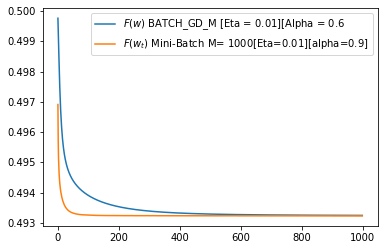

In [ ]:
plt.plot((res_obj_func_BGD_M[3])[:epoch], label='$F(w)$ BATCH_GD_M' + ' [Eta = 0.01]'+'[Alpha = 0.6')
plt.plot(res_obj_func_MBGD_M[3][:epoch], label='$F(w_{t})$ Mini-Batch M= '+str(1000)+'[Eta=0.01]'+'[alpha=0.9]')
plt.legend(loc='upper right')

Cálculamos nuestro w_optimo, mediante el algoritmo MiniBatch Gradient Descent Momentum (que resulta ser el más rápido en converger).

In [ ]:
w_t = np.zeros(d)
v_t = np.zeros(d)
epoch = 1000
t = 0
decay = 10**(-13)
i = 0
# Loop:
while t <= epoch:
  permutation = np.random.permutation(Xs.shape[0])
  Xs = Xs[permutation]
  ys = ys[permutation]

  while i <= int(np.floor(Xs.shape[0]/m)):
    g_t = gradiente_minibatch(Xs,ys,w_t,m,i)
    v_t = 0.9*v_t - 0.01 * g_t
    w_t = w_t - 0.01 * g_t
    i = i + 1
  eta = 0.01 * (1/(1+decay*t))
  t=t+1
  i = 0
  error = np.sum(error_gdb(Xs,ys,w_t))/n
  objective_func_MBGD_M.append(error)
w_opt=w_t
print("Listo!")

Listo!


Y hacemos nuestra predicción

In [ ]:
Xw_opt = np.dot(Xs,w_opt) 
        
def pred(Xw_opt, umbral): 
    res = np.where(Xw_opt > umbral, 1, -1)
    return res

preds = pred(Xw_opt, 0)

accuracy = metrics.accuracy_score(ys, preds)
recall = metrics.recall_score(ys, preds)
precision = metrics.precision_score(ys, preds)
f1_score = metrics.f1_score(ys, preds)
cf = metrics.confusion_matrix(ys, preds)
cf = pd.DataFrame(cf)
cf

,0,1
0,12100,7117
1,211,572


In [ ]:
table = pd.DataFrame([accuracy, recall, precision, f1_score],
                    ['Accuracy', 'Recall', 'Precision', 'F1-Score'])

table

,0
Accuracy,0.633600
Recall,0.730524
Precision,0.074392
F1-Score,0.135033


Se puede observar que el modelo es muy bueno detectando Verdaderos Positivos, no así con los Falsos Negativos. Además, tiene una predisposición a clasificar un elemento como 0, antes que 1.

También se puede decir que el modelo se equivoca más al momento de clasificar a un elemento como 0 que como 1.

Es llamativa la baja precisión que entrega el modelo. Lo que quiere decir que el desempeño del modelo responde más bien al achunte que a predecir correctamente casos específicos.

Sin embargo, los números en general son bastante pobres, lo que puede hablar de un mal proceso de desarrollo del modelo, una mala calidad de los datos, una mala elección de las funciones de pérdida, entre otros.